In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

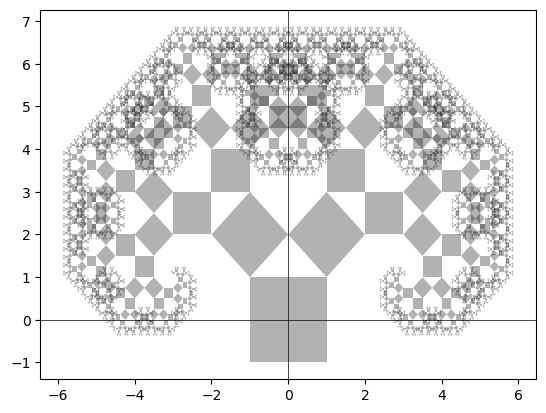

In [73]:
#Finds the difference between 2 vectors used to translate the squares
def calc_diff(start, finish):
    return finish - start

#Defines first square by outlining the start and finish of the line segments
start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  

#Defines the angle by which the box will be rotated by 
angle = np.pi / 4

#Defines the rotation matrix for clockwise rotaion
clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), np.sin(angle)],
    [-np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

#Defines the rotation matrix for anti-clockwise rotaion
anti_clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

#Fills in the starting box with opacity of 0.3
x = start_points[:, 0]
y = start_points[:, 1]
plt.fill(x, y, 'k-', alpha=0.3)  


def left_square(current_points):
    """
    Function that takes in a pytorch tensor containing the coordinates of the 
    current square. It then outputs a tensor containing the coordinates of the 
    next left hand side square.

    Input: Tesor containing current box coordinates
    Output: Tensor containing next LHS box coordinates
    """
    #Rotates the current box
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    #Scales the current box
    rotated_points /= np.sqrt(2) 
    #Translates the current box
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    plt.fill(x, y, 'k-', alpha=0.3) 
    return rotated_points

def right_square(current_points):
    """
    Function that takes in a pytorch tensor containing the coordinates of the 
    current square. It then outputs a tensor containing the coordinates of the 
    next right hand side square.

    Input: Tesor containing current box coordinates
    Output: Tensor containing next RHS box coordinates
    """
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    plt.fill(x, y, 'k-', alpha=0.3)  
    return rotated_points

#Defines a list that will act as a binary tree to store box coordinates
binary_tree = [start_points]

#Defines the number of nodes needed in a complete tea of 12 levels 
total_nodes = (2**12)-1

#Iterates through all nodes starting from position 2 (index 1)
for i in range(2, total_nodes):
    if i % 2 == 0:
        #If the node is even then makes a RHS branch 
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index]))
    else:
        #If the node is odd then makes a LHS branch
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index]))

#Plots the final image
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

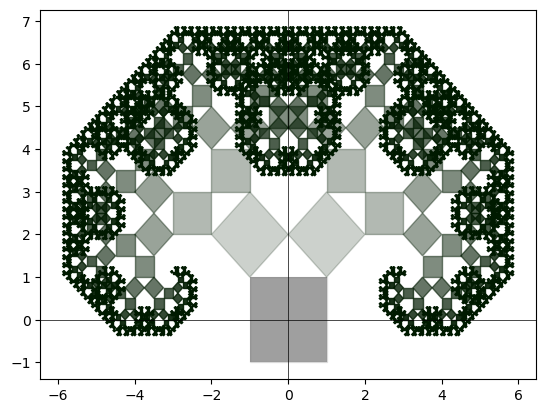

End


In [75]:
def calc_diff(start, finish):
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  

angle = np.pi / 4

clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), np.sin(angle)],
    [-np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

x = start_points[:, 0]
y = start_points[:, 1]
plt.fill(x, y, 'k-', alpha=0.3)  

#New function that aims to return an unique opacity based on the depth of tree
def get_alpha(depth):
    return min(1, 0.1 + depth * 0.1)

plt.fill(x, y, color=(0, 0, 0, get_alpha(0)))  

binary_tree = [start_points]

#Left square now also takes in the depth of the tree to vary the opacity of boxs
def left_square(current_points, depth):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    rotated_points /= np.sqrt(2)  
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])     
    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points

#Right square also takes in the depth of the tree to vary the opacity of boxs
def right_square(current_points, depth):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    rotated_points /= np.sqrt(2) 
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points

total_nodes = (2**12)-1

for i in range(2, total_nodes):
    #Calculates the current depth of the tree
    depth = int(math.log(i, 2))  
    if i % 2 == 0:
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index], depth))
    else:
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index], depth))

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
print("End")

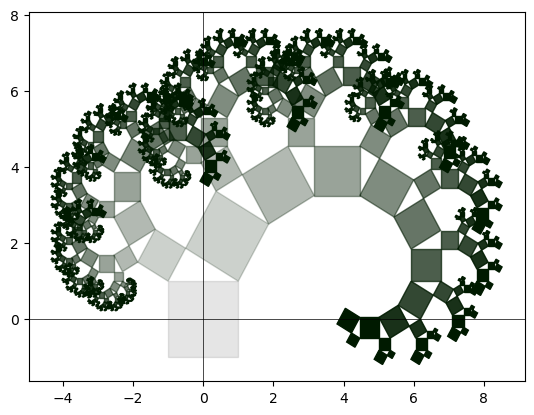

End


In [69]:
def calc_diff(start, finish):
    return finish - start

start_points = torch.tensor([[1, -1],
                             [-1, -1],
                             [-1, 1],
                             [1, 1],
                             [1, -1]], dtype=torch.float32)  
#Defines 2 different angles for LHS and RHS
l_angle = np.pi/3
r_angle = np.pi/6

clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), np.sin(angle)],
    [-np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

anti_clk_rotation_matrix = torch.tensor(
    [[np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]], 
    dtype=torch.float32)

current_points = start_points
x = current_points[:, 0]
y = current_points[:, 1]

def get_alpha(depth):
    return min(1, 0.1 + depth * 0.1)

plt.fill(x, y, color=(0, 0, 0, get_alpha(0)))  

binary_tree = [start_points]

def left_square(current_points, depth):
    rotated_points = torch.matmul(current_points, clk_rotation_matrix)
    #Applies seperate scaling factor for LHS
    rotated_points /= 2 
    x_delta, y_delta = calc_diff(current_points[2], rotated_points[1])     
    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points

def right_square(current_points, depth):
    rotated_points = torch.matmul(current_points, anti_clk_rotation_matrix)
    #Applies seperate scaling fcator for RHS
    rotated_points *= (np.sqrt(3)/2)
    x_delta, y_delta = calc_diff(current_points[3], rotated_points[0])  

    rotated_points[:, 0] -= x_delta
    rotated_points[:, 1] -= y_delta
    x = rotated_points[:, 0]
    y = rotated_points[:, 1]
    alpha = get_alpha(depth)  
    plt.fill(x, y, color=(0, 0.1, 0, alpha))  
    return rotated_points


for i in range(2, 2046):
    depth = int(math.log(i, 2))  
    if i % 2 == 0:
        index = int((i / 2) - 1)
        binary_tree.append(right_square(binary_tree[index], depth))
    else:
        index = int(((i - 1) / 2) - 1)
        binary_tree.append(left_square(binary_tree[index], depth))

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
print("End")